# Option3: Mapping based on UCLA distribution


In [52]:
import pandas as pd
import numpy as np
from functools import reduce
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns

#### GLAD

In [53]:
dfg = pd.read_stata("data/GLAD/GladWithRejion_030323_updated.dta")

In [54]:
dfg.ptb_4145.isna().sum()

10207

##### Remove Nan value

In [55]:
# Remove NaN value from UCLA in GLAD:
dfg = dfg.dropna(subset=['ptb_4145', 'pt12_4145'])
print("GLAD shape:",dfg.shape)

GLAD shape: (30484, 1240)


In [56]:
print("Number of Nan Value in baseline:", dfg.ptb_4145.isna().sum())
print("Number of Nan Value in followup:", dfg.pt12_4145.isna().sum())

Number of Nan Value in baseline: 0
Number of Nan Value in followup: 0


##### Distribution of PTB_4145 and PT12_4145 

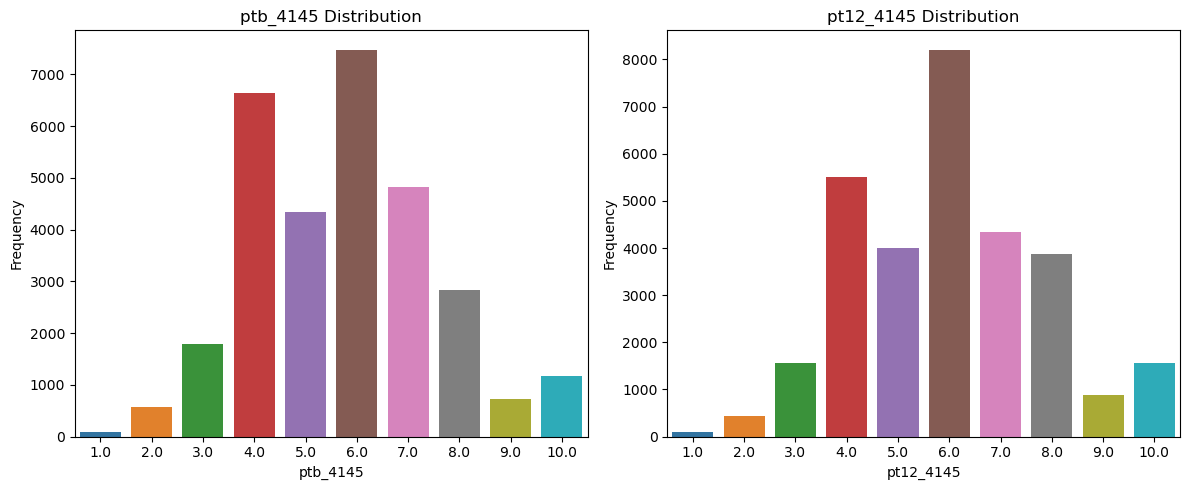

ptb_4145 Max: 10.0, Min: 1.0
pt12_4145 Max: 10.0, Min: 1.0
Shape of dataframe: (30484, 1240)


In [57]:
ptb_4145_counts = dfg['ptb_4145'].value_counts().reset_index()
ptb_4145_counts.columns = ['ptb_4145', 'count']

pt12_4145_counts = dfg['pt12_4145'].value_counts().reset_index()
pt12_4145_counts.columns = ['pt12_4145', 'count']

# Setting up the figure and axes for the subplot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Bar Plot for ptb_4145
sns.barplot(x='ptb_4145', y='count', data=ptb_4145_counts, ax=axes[0])  # Adjusting the plot to a bar plot
axes[0].set_title('ptb_4145 Distribution')
axes[0].set_xlabel('ptb_4145')
axes[0].set_ylabel('Frequency')

# Bar Plot for pt12_4145
sns.barplot(x='pt12_4145', y='count', data=pt12_4145_counts, ax=axes[1])  # Adjusting the plot to a bar plot
axes[1].set_title('pt12_4145 Distribution')
axes[1].set_xlabel('pt12_4145')
axes[1].set_ylabel('Frequency')

# Display the plot
plt.tight_layout()  # Adjusts the subplots to fit into the figure area.
plt.show()

# Printing the max and min values for both ptb_4145 and pt12_4145
print(f"ptb_4145 Max: {dfg['ptb_4145'].max()}, Min: {dfg['ptb_4145'].min()}")
print(f"pt12_4145 Max: {dfg['pt12_4145'].max()}, Min: {dfg['pt12_4145'].min()}")
print(f"Shape of dataframe: {dfg.shape}")


##### Increased / Decreased

/var/folders/rn/9h9wnd_x13930h39r4t9tt_w0000gr/T/ipykernel_55941/2721804660.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfg['change'] = dfg['pt12_4145'] - dfg['ptb_4145']
/var/folders/rn/9h9wnd_x13930h39r4t9tt_w0000gr/T/ipykernel_55941/2721804660.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfg['change_category'] = pd.cut(dfg['change'], bins=[float('-inf'), -0.01, 0.01, float('inf')],
/var/folders/rn/9h9wnd_x13930h39r4t9tt_w0000gr/T/ipykernel_55941/2721804660.py:31: FutureWarning: Series.__getitem__ treating keys 

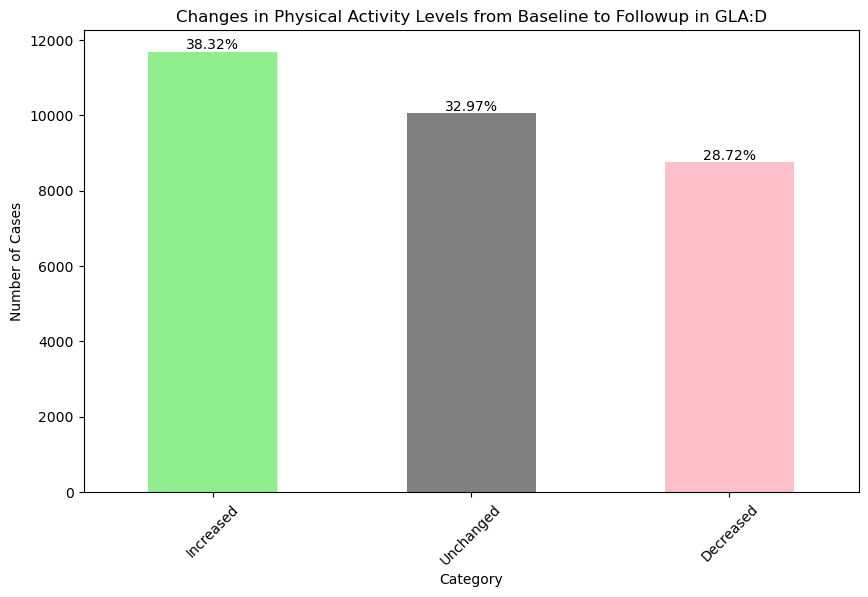

In [58]:
# Calculate the difference
dfg['change'] = dfg['pt12_4145'] - dfg['ptb_4145']

# Categorize the changes
dfg['change_category'] = pd.cut(dfg['change'], bins=[float('-inf'), -0.01, 0.01, float('inf')],
                               labels=['Decreased', 'Unchanged', 'Increased'])

# Ensure the order: Increased, Unchanged, Decreased
order = ['Increased', 'Unchanged', 'Decreased']

# Count the number of cases in each category, reindex to ensure order
change_counts = dfg['change_category'].value_counts().reindex(order)

# Calculate percentages
total = change_counts.sum()
percentages = (change_counts / total * 100).round(2)

# Specify colors for each category
colors = ['lightgreen', 'grey', 'pink']

# Visualize the results with a bar plot
fig, ax = plt.subplots(figsize=(10, 6))
change_counts.plot(kind='bar', color=colors, ax=ax)
plt.title('Changes in Physical Activity Levels from Baseline to Followup in GLA:D')
ax.set_xlabel('Category')
ax.set_ylabel('Number of Cases')
plt.xticks(rotation=45)

# Annotate each bar with the percentage of cases
for i, value in enumerate(change_counts.values):
    ax.text(i, value, f'{percentages[i]}%', ha='center', va='bottom')

plt.show()


In [59]:
dfg

,fysb_replyTime,fysb_3629,fysb_affiliationId,fysb_affiliation_samlet,fysb_organisation,fysb_region,age,gender,fysb_9344,fysb_9345,...,PT12_39675,PT12_39676,Pt12_fes_i_score,PT12_39880,PT12_39881,stop_replyTime,stop_9561,stop_9563,change,change_category
0,2013-01-29 14:37:42,2013-01-14,11431,11431,3.0,5.0,70,1,71.0,172.0,...,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,4.0,Increased
1,2013-01-29 14:49:19,2013-01-15,11431,11431,3.0,5.0,66,2,69.0,164.0,...,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,0.0,Unchanged
2,2013-01-30 09:58:02,2013-12-06,11431,11431,3.0,5.0,44,2,102.0,178.0,...,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,0.0,Unchanged
3,2013-01-30 14:10:27,2013-01-30,11475,1100,2.0,2.0,49,1,110.0,180.0,...,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,0.0,Unchanged
4,2013-02-01 11:11:03,2013-02-01,11431,11431,3.0,5.0,67,2,82.0,169.0,...,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,1.0,Increased
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60297,2022-01-12 14:12:35,2022-01-12,359434,359434,3.0,3.0,47,2,84.0,178.0,...,3.0,4.0,20.0,4.0,4.0,NaT,NaT,NaN,-2.0,Decreased
60298,2022-01-12 14:18:03,2022-01-12,360248,360248,3.0,4.0,65,2,96.0,178.0,...,1.0,2.0,10.0,4.0,4.0,NaT,NaT,NaN,-2.0,Decreased
60305,2022-01-13 08:31:09,2022-01-13,16717,16717,3.0,3.0,45,2,75.0,167.0,...,1.0,1.0,7.0,4.0,4.0,NaT,NaT,NaN,0.0,Unchanged
60307,2022-01-13 09:20:05,2022-01-13,16380,16380,2.0,2.0,60,2,72.0,161.0,...,2.0,1.0,9.0,4.0,4.0,NaT,NaT,NaN,0.0,Unchanged


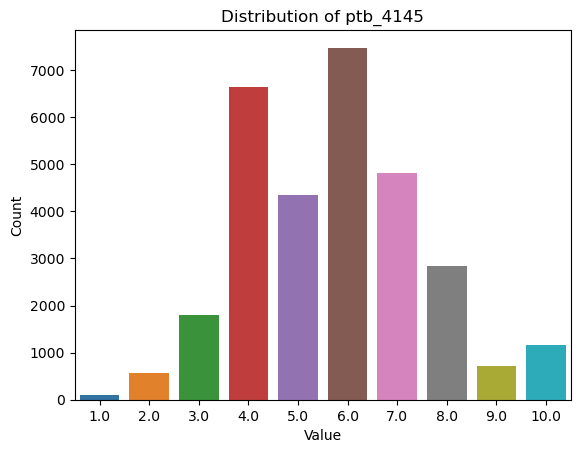

In [60]:
sns.countplot(x='ptb_4145', data=dfg)

# To display the plot with labels
plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Distribution of ptb_4145')
plt.show()


In [61]:
dfg['ptb_4145'].value_counts(normalize=True)

ptb_4145
6.0     0.245276
4.0     0.217950
7.0     0.158280
5.0     0.142599
8.0     0.093196
3.0     0.058949
10.0    0.038151
9.0     0.023685
2.0     0.018830
1.0     0.003084
Name: proportion, dtype: float64

In [62]:
###### Dividet Glad to 10 part based on the unique value:
dfg['ptb_4145'].value_counts(normalize=True) * 100

ptb_4145
6.0     24.527621
4.0     21.795040
7.0     15.827975
5.0     14.259940
8.0      9.319643
3.0      5.894896
10.0     3.815116
9.0      2.368456
2.0      1.882955
1.0      0.308358
Name: proportion, dtype: float64

In [63]:
########
# 6:24
# 4:22
# 7:16
# 5:14
# 8:9
# 3:6
# 10:4
# 9:2
# 2:2
# 1:1

#######

#### OAI

In [64]:
df = pd.read_csv("data/OAI/merged_three_OAI.csv")
print(df.shape)
df

(4308, 1817)


,ID,V00BLDCOLL,V00BLDHRS1,V00BLDHRS2,V00BLDRAW1,V00BLDRAW2,V00BLSURD1,V00BLSURD2,V00CITRATE,V00EDTA,...,V08IMAGESE,V08IMAGESF,V08IMAGESG,V10IMAGESA,V10IMAGESB,V10IMAGESC,V10IMAGESD,V10IMAGESE,V10IMAGESF,V10IMAGESG
0,b'9000099',1.0,35400.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,b'9000296',1.0,30780.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0
2,b'9000622',1.0,33900.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0
3,b'9000798',1.0,26400.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,b'9001104',1.0,35100.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4303,b'9999295',2.0,NaN,28800.0,0.0,1.0,NaN,NaN,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4304,b'9999365',1.0,27600.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4305,b'9999862',1.0,30600.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4306,b'9999865',1.0,36600.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [65]:
print("PASE baseline, number of NaN:", df.V00PASE.isna().sum())
print("PASE followup, number of NaN:", df.V01PASE.isna().sum())

PASE baseline, number of NaN: 0
PASE followup, number of NaN: 0


In [66]:
print(df.V00PASE.min())
print(df.V00PASE.max())

0.0
531.0


/Users/mahdie/opt/anaconda3/envs/physioai/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mahdie/opt/anaconda3/envs/physioai/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


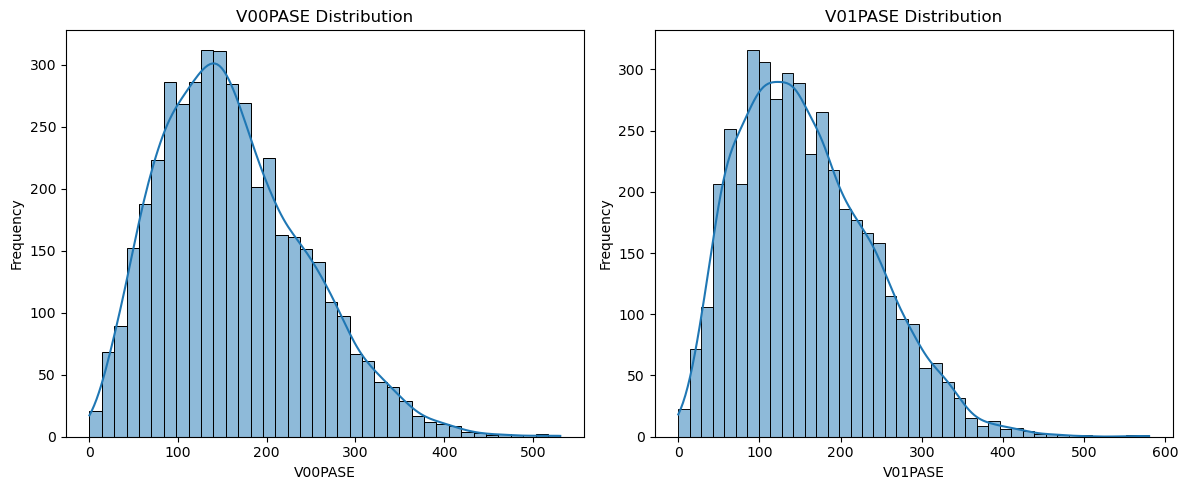

V00PASE Max: 531.0, Min: 0.0
V01PASE Max: 580.0, Min: 0.0
Shape dataframe: (4308, 1817)


In [67]:
# Setting up the figure and axes for the subplot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot for V00PASE
sns.histplot(df['V00PASE'], kde=True, ax=axes[0])  # Adding the plot to the first subplot
axes[0].set_title('V00PASE Distribution')
axes[0].set_xlabel('V00PASE')
axes[0].set_ylabel('Frequency')

# Plot for V01PASE
sns.histplot(df['V01PASE'], kde=True, ax=axes[1])  # Adding the plot to the second subplot
axes[1].set_title('V01PASE Distribution')
axes[1].set_xlabel('V01PASE')
axes[1].set_ylabel('Frequency')

# Display the plot
plt.tight_layout()  # Adjusts the subplots to fit into the figure area.
plt.show()

# Printing the max and min values for both V00PASE and V01PASE
print(f"V00PASE Max: {df.V00PASE.max()}, Min: {df.V00PASE.min()}")
print(f"V01PASE Max: {df.V01PASE.max()}, Min: {df.V01PASE.min()}")
print("Shape dataframe:", df.shape)


In [68]:
# Define the percentages comes from UCLA:
percentages = [1, 2, 6, 22, 14, 24, 16, 9, 2, 4]

In [69]:
df.sort_values(by='V00PASE', ascending=True, inplace=True)

In [70]:
def categorize_dataframe_and_track_min_max(df, percentages, track_column, category_name='Category'):
    """
    Assign categories to rows in a DataFrame based on a list of percentages and
    track the min and max values of a specified column for each category.
    
    Parameters:
    - df: The DataFrame to be categorized.
    - percentages: A list of percentages for the categorization.
    - track_column: The name of the column for which to track the min and max values.
    - category_name: The name of the new column to add for categorization.
    
    Returns:
    - The modified DataFrame with added categorization and min/max tracking.
    """
    
    if sum(percentages) > 100:
        raise ValueError("The sum of the percentages cannot exceed 100.")
    
    total_rows = len(df)
    cumulative_percentage = 0
    start_idx = 0
    category_min_max = {}  # To store min and max values for each category
    df[category_name] = -1
    
    for i, percentage in enumerate(percentages):
        next_cumulative_percentage = cumulative_percentage + percentage
        end_idx = round(total_rows * (next_cumulative_percentage / 100))
        
        # Assign category
        df.iloc[start_idx:end_idx, df.columns.get_loc(category_name)] = i+1
        
        # Track min and max of the specified column for the current category
        category_range = df.iloc[start_idx:end_idx]
        category_min_max[i+1] = {
            'min': category_range[track_column].min(),
            'max': category_range[track_column].max(),
            'count': end_idx - start_idx,
         
        }
        
        start_idx = end_idx
        cumulative_percentage = next_cumulative_percentage
    
    # If any rows are unassigned due to rounding, assign them to the last category
    if start_idx < total_rows:
        df.iloc[start_idx:, df.columns.get_loc(category_name)] = len(percentages)
        # Update the last category's max value if necessary
        last_category_range = df.iloc[start_idx:]
        last_category_min = last_category_range[track_column].min()
        last_category_max = last_category_range[track_column].max()
        last_key = f'{len(percentages)}'
        if last_key in category_min_max:
            category_min_max[last_key]['min'] = min(category_min_max[last_key]['min'], last_category_min)
            category_min_max[last_key]['max'] = max(category_min_max[last_key]['max'], last_category_max)
            category_min_max['count'] = category_min_max['count'] + total_rows - start_idx
        else:
            category_min_max[last_key] = {'min': last_category_min, 'max': last_category_max, 'count': total_rows - start_idx}

    return df, category_min_max

In [71]:
df, category_min_max = categorize_dataframe_and_track_min_max(df.sort_values(by='V00PASE', ascending=True).reset_index(), 
                                                               percentages, 'V00PASE', 
                                                               category_name='baseline')

In [72]:
df, category_min_max = categorize_dataframe_and_track_min_max(df.sort_values(by='V01PASE', ascending=True).reset_index(), 
                                                               percentages, 'V01PASE', 
                                                               category_name='followup')

In [73]:
df

,level_0,index,ID,V00BLDCOLL,V00BLDHRS1,V00BLDHRS2,V00BLDRAW1,V00BLDRAW2,V00BLSURD1,V00BLSURD2,...,V08IMAGESG,V10IMAGESA,V10IMAGESB,V10IMAGESC,V10IMAGESD,V10IMAGESE,V10IMAGESF,V10IMAGESG,baseline,followup
0,0,327,b'9083500',1.0,33000.0,NaN,1.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,1,1
1,92,620,b'9164114',1.0,33000.0,NaN,1.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,2,1
2,143,4283,b'9993846',1.0,28320.0,NaN,1.0,NaN,NaN,NaN,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,3,1
3,3115,260,b'9066155',1.0,35400.0,NaN,1.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,7,1
4,15,753,b'9202047',1.0,35700.0,NaN,1.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4303,4263,2160,b'9521956',1.0,28440.0,NaN,1.0,NaN,NaN,NaN,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,10,10
4304,4218,1747,b'9438852',1.0,31980.0,NaN,1.0,NaN,NaN,NaN,...,NaN,0.0,0.0,0.0,0.0,1.0,0.0,1.0,10,10
4305,2617,2295,b'9549405',1.0,38040.0,NaN,1.0,NaN,NaN,NaN,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,6,10
4306,4287,3856,b'9894047',1.0,27420.0,NaN,1.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,10,10


/Users/mahdie/opt/anaconda3/envs/physioai/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mahdie/opt/anaconda3/envs/physioai/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


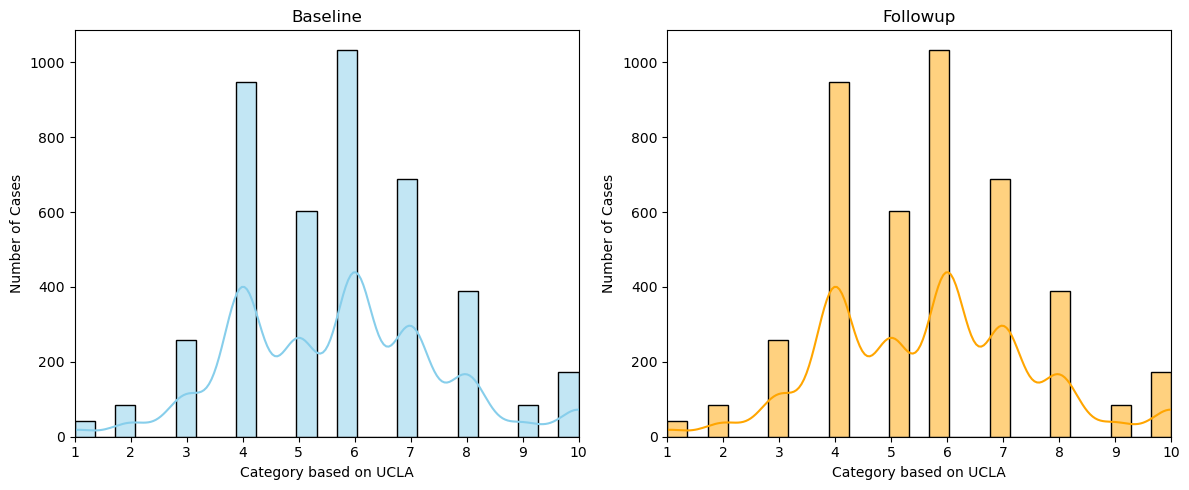

In [74]:
# PLOT:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df['baseline'], ax=axs[0], color='skyblue', kde=True).set_title('Baseline')
sns.histplot(df['followup'], ax=axs[1], color='orange', kde=True).set_title('Followup')

# Set the labels for the x and y axes
axs[0].set_xlabel('Category based on UCLA')
axs[0].set_ylabel('Number of Cases')

axs[1].set_xlabel('Category based on UCLA')
axs[1].set_ylabel('Number of Cases')

# Set x-ticks to display every integer from 1 to 10.
axs[0].set_xticks(range(1, 11))
axs[1].set_xticks(range(1, 11))

# Optionally, you can also ensure that x-axis limits include the full range from 1 to 10
axs[0].set_xlim(1, 10)
axs[1].set_xlim(1, 10)

plt.tight_layout()
plt.show()


##### Plot with cut point:

{'min': 0.0, 'max': 25.0, 'count': 43}
{'min': 25.0, 'max': 33.0, 'count': 86}
{'min': 34.0, 'max': 55.0, 'count': 259}
{'min': 55.0, 'max': 107.0, 'count': 947}
{'min': 107.0, 'max': 136.0, 'count': 604}
{'min': 136.0, 'max': 192.0, 'count': 1034}
{'min': 192.0, 'max': 246.0, 'count': 689}
{'min': 247.0, 'max': 297.0, 'count': 388}
{'min': 297.0, 'max': 318.0, 'count': 86}
{'min': 318.0, 'max': 580.0, 'count': 172}


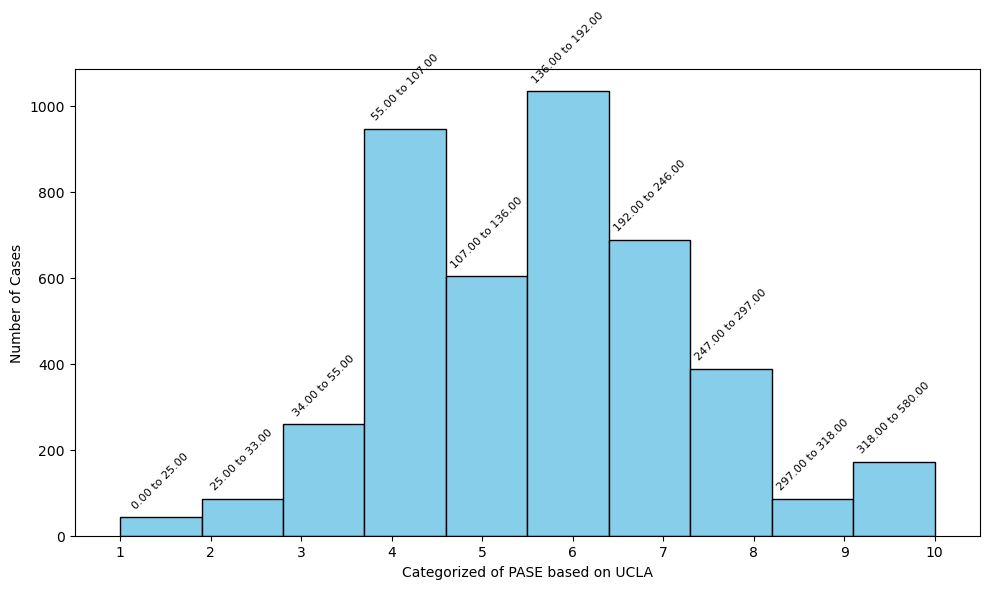

In [75]:
data = df 

# Creating the histogram plot
fig, ax = plt.subplots(figsize=(10, 6))
counts, bins, patches = ax.hist(data['baseline'], color='skyblue', edgecolor='black')

# Annotating each bin with the min and max value of that bin
for bin_left, bin_right, patch, cat_minmax in zip(bins, bins[1:], patches, category_min_max.values()):
    # Calculate the center of the bin for the x position of the annotation
    bin_center = (bin_left + bin_right) / 2
    # Prepare the annotation text as the range of the bin
    print(cat_minmax)
    annotation_text = f"{cat_minmax['min']:.2f} to {cat_minmax['max']:.2f}"
    # Place the annotation above the bin (using the patch height for the y position)
    ax.annotate(annotation_text, xy=(bin_center, patch.get_height()), xytext=(0, 5), 
                textcoords='offset points', ha='center', va='bottom', fontsize=8, rotation=45)

# Set the ticks for every integer between 1 and 10
ax.set_xticks(range(1, 11))

# Optional: Set the x-axis limit to frame the histogram neatly
ax.set_xlim(0.5, 10.5)

ax.set_xlabel('Categorized of PASE based on UCLA')
ax.set_ylabel('Number of Cases')

plt.tight_layout()
plt.show()


In [76]:
df

,level_0,index,ID,V00BLDCOLL,V00BLDHRS1,V00BLDHRS2,V00BLDRAW1,V00BLDRAW2,V00BLSURD1,V00BLSURD2,...,V08IMAGESG,V10IMAGESA,V10IMAGESB,V10IMAGESC,V10IMAGESD,V10IMAGESE,V10IMAGESF,V10IMAGESG,baseline,followup
0,0,327,b'9083500',1.0,33000.0,NaN,1.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,1,1
1,92,620,b'9164114',1.0,33000.0,NaN,1.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,2,1
2,143,4283,b'9993846',1.0,28320.0,NaN,1.0,NaN,NaN,NaN,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,3,1
3,3115,260,b'9066155',1.0,35400.0,NaN,1.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,7,1
4,15,753,b'9202047',1.0,35700.0,NaN,1.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4303,4263,2160,b'9521956',1.0,28440.0,NaN,1.0,NaN,NaN,NaN,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,10,10
4304,4218,1747,b'9438852',1.0,31980.0,NaN,1.0,NaN,NaN,NaN,...,NaN,0.0,0.0,0.0,0.0,1.0,0.0,1.0,10,10
4305,2617,2295,b'9549405',1.0,38040.0,NaN,1.0,NaN,NaN,NaN,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,6,10
4306,4287,3856,b'9894047',1.0,27420.0,NaN,1.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,10,10


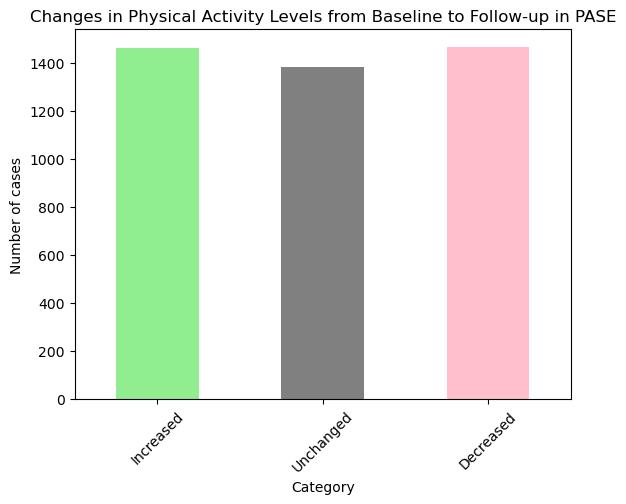

In [77]:
# Calculate the difference
df['change'] = df['followup'] - df['baseline']

# Define the function to categorize changes
def categorize_change(change):
    if change > 0:
        return 'Increased'
    elif change < 0:
        return 'Decreased'
    else:
        return 'Unchanged'

# Apply the function to categorize changes
df['change_category'] = df['change'].apply(categorize_change)
# Calculate percentages
change_counts = df['change_category'].value_counts().reindex(['Increased', 'Unchanged', 'Decreased'])
# change_percentages = df['change_category'].value_counts(normalize=True).reindex(["Increased", "Unchanged", "Decreased"]) * 100

# Plot
change_counts.plot(kind='bar', color=['lightgreen', 'grey', 'pink'])
plt.title('Changes in Physical Activity Levels from Baseline to Follow-up in PASE')
plt.xlabel('Category')
plt.ylabel('Number of cases')
plt.xticks(rotation=45)

plt.show()


In [78]:
# Calculate the difference
df['change'] = df['followup'] - df['baseline']

# Categorize the changes
def categorize_change(change):
    if change > 0:
        return 'Increased'
    elif change < 0:
        return 'Decreased'
    else:
        return 'Unchanged'

df['change_category'] = df['change'].apply(categorize_change)

# Count how many cases are in each category
change_counts = df['change_category'].value_counts()

# Display the counts
print(change_counts)

# If you wish to calculate percentages
change_percentages = df['change_category'].value_counts(normalize=True) * 100
print(change_percentages)


change_category
Decreased    1465
Increased    1462
Unchanged    1381
Name: count, dtype: int64
change_category
Decreased    34.006500
Increased    33.936862
Unchanged    32.056639
Name: proportion, dtype: float64


#### Analysis

In [79]:
df

,level_0,index,ID,V00BLDCOLL,V00BLDHRS1,V00BLDHRS2,V00BLDRAW1,V00BLDRAW2,V00BLSURD1,V00BLSURD2,...,V10IMAGESB,V10IMAGESC,V10IMAGESD,V10IMAGESE,V10IMAGESF,V10IMAGESG,baseline,followup,change,change_category
0,0,327,b'9083500',1.0,33000.0,NaN,1.0,NaN,NaN,NaN,...,0.0,0.0,0.0,NaN,0.0,0.0,1,1,0,Unchanged
1,92,620,b'9164114',1.0,33000.0,NaN,1.0,NaN,NaN,NaN,...,0.0,0.0,0.0,NaN,0.0,0.0,2,1,-1,Decreased
2,143,4283,b'9993846',1.0,28320.0,NaN,1.0,NaN,NaN,NaN,...,1.0,1.0,1.0,0.0,0.0,0.0,3,1,-2,Decreased
3,3115,260,b'9066155',1.0,35400.0,NaN,1.0,NaN,NaN,NaN,...,0.0,0.0,0.0,NaN,0.0,0.0,7,1,-6,Decreased
4,15,753,b'9202047',1.0,35700.0,NaN,1.0,NaN,NaN,NaN,...,0.0,0.0,0.0,NaN,0.0,0.0,1,1,0,Unchanged
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4303,4263,2160,b'9521956',1.0,28440.0,NaN,1.0,NaN,NaN,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,10,10,0,Unchanged
4304,4218,1747,b'9438852',1.0,31980.0,NaN,1.0,NaN,NaN,NaN,...,0.0,0.0,0.0,1.0,0.0,1.0,10,10,0,Unchanged
4305,2617,2295,b'9549405',1.0,38040.0,NaN,1.0,NaN,NaN,NaN,...,0.0,1.0,1.0,0.0,0.0,0.0,6,10,4,Increased
4306,4287,3856,b'9894047',1.0,27420.0,NaN,1.0,NaN,NaN,NaN,...,0.0,0.0,0.0,1.0,0.0,0.0,10,10,0,Unchanged


In [80]:
# Define your baseline boundaries as a dictionary
baseline_boundaries = {
    1: {'min': 0.0, 'max': 25.0},
    2: {'min': 25.0, 'max': 33.0},
    3: {'min': 34.0, 'max': 55.0},
    4: {'min': 55.0, 'max': 107.0},
    # ... and so on for the rest of your baseline values
}

# DataFrame `df` is assumed to be already loaded.

# Initialize a dictionary to store the results
overlap_cases = {}

# Loop over the baseline boundaries
for baseline in range(1, len(baseline_boundaries)):
    # We're checking overlaps between baseline and baseline+1
    overlap_value = baseline_boundaries[baseline]['max']
    # How many cases in baseline have the overlap_value for V00PASE?
    count_in_baseline = df[(df['baseline'] == baseline) & (df['V00PASE'] == overlap_value)].shape[0]
    # How many cases in baseline+1 have the overlap_value for V00PASE?
    count_in_next_baseline = df[(df['baseline'] == baseline + 1) & (df['V00PASE'] == overlap_value)].shape[0]
    
    # Store the results
    overlap_cases[baseline] = {
        'overlap_value': overlap_value,
        'count_in_baseline': count_in_baseline,
        'count_in_next_baseline': count_in_next_baseline
    }

# Now overlap_cases dictionary contains the counts for each overlap point
print(overlap_cases)


{1: {'overlap_value': 25.0, 'count_in_baseline': 10, 'count_in_next_baseline': 15}, 2: {'overlap_value': 33.0, 'count_in_baseline': 7, 'count_in_next_baseline': 0}, 3: {'overlap_value': 55.0, 'count_in_baseline': 28, 'count_in_next_baseline': 0}}


In [81]:
# Format: {baseline_category: V00PASE_value}
values_to_check = {
    2: 25, # Baseline 2 and V00PASE = 25
    3: 34,
    4: 55,
    5: 107,
    6: 136,
    7: 192,
    8: 247,
    9: 297,
    10: 318
}
# Initialize a dictionary to store the counts
counts = {}

# Iterate over the values to check and count the occurrences
for baseline_category, v00pase_value in values_to_check.items():
    count = df[(df['baseline'] == baseline_category) & (df['V00PASE'] == v00pase_value)].shape[0]
    counts[baseline_category] = count

# Printing the results
for category, count in counts.items():
    print(f"Number of cases with baseline={category} and V00PASE={values_to_check[category]}: {count}")


Number of cases with baseline=2 and V00PASE=25: 15
Number of cases with baseline=3 and V00PASE=34: 10
Number of cases with baseline=4 and V00PASE=55: 0
Number of cases with baseline=5 and V00PASE=107: 0
Number of cases with baseline=6 and V00PASE=136: 0
Number of cases with baseline=7 and V00PASE=192: 0
Number of cases with baseline=8 and V00PASE=247: 0
Number of cases with baseline=9 and V00PASE=297: 0
Number of cases with baseline=10 and V00PASE=318: 0


In [82]:
df

,level_0,index,ID,V00BLDCOLL,V00BLDHRS1,V00BLDHRS2,V00BLDRAW1,V00BLDRAW2,V00BLSURD1,V00BLSURD2,...,V10IMAGESB,V10IMAGESC,V10IMAGESD,V10IMAGESE,V10IMAGESF,V10IMAGESG,baseline,followup,change,change_category
0,0,327,b'9083500',1.0,33000.0,NaN,1.0,NaN,NaN,NaN,...,0.0,0.0,0.0,NaN,0.0,0.0,1,1,0,Unchanged
1,92,620,b'9164114',1.0,33000.0,NaN,1.0,NaN,NaN,NaN,...,0.0,0.0,0.0,NaN,0.0,0.0,2,1,-1,Decreased
2,143,4283,b'9993846',1.0,28320.0,NaN,1.0,NaN,NaN,NaN,...,1.0,1.0,1.0,0.0,0.0,0.0,3,1,-2,Decreased
3,3115,260,b'9066155',1.0,35400.0,NaN,1.0,NaN,NaN,NaN,...,0.0,0.0,0.0,NaN,0.0,0.0,7,1,-6,Decreased
4,15,753,b'9202047',1.0,35700.0,NaN,1.0,NaN,NaN,NaN,...,0.0,0.0,0.0,NaN,0.0,0.0,1,1,0,Unchanged
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4303,4263,2160,b'9521956',1.0,28440.0,NaN,1.0,NaN,NaN,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,10,10,0,Unchanged
4304,4218,1747,b'9438852',1.0,31980.0,NaN,1.0,NaN,NaN,NaN,...,0.0,0.0,0.0,1.0,0.0,1.0,10,10,0,Unchanged
4305,2617,2295,b'9549405',1.0,38040.0,NaN,1.0,NaN,NaN,NaN,...,0.0,1.0,1.0,0.0,0.0,0.0,6,10,4,Increased
4306,4287,3856,b'9894047',1.0,27420.0,NaN,1.0,NaN,NaN,NaN,...,0.0,0.0,0.0,1.0,0.0,0.0,10,10,0,Unchanged


In [83]:
# Initialize a dictionary to store the cases
cases = {}

# Iterate over the values to check and find the occurrences
for baseline_category, v00pase_value in values_to_check.items():
    matching_cases = df[(df['baseline'] == baseline_category) & (df['V00PASE'] == v00pase_value)]
    cases[baseline_category] = matching_cases

# Now let's print out the cases for each condition
for category, matching_cases in cases.items():
    print(f"Cases with baseline={category} and V00PASE={values_to_check[category]}:")
    print(matching_cases, '\n')


Cases with baseline=2 and V00PASE=25:
      level_0  index          ID  V00BLDCOLL  V00BLDHRS1  V00BLDHRS2  \
38         55   4222  b'9977206'         1.0     38700.0         NaN   
62         43   1416  b'9368084'         1.0     33900.0         NaN   
113        47   2890  b'9668271'         1.0     33000.0         NaN   
181        48    307  b'9076489'         1.0     45900.0         NaN   
268        50    995  b'9265514'         1.0     31200.0         NaN   
898        51   1207  b'9315555'         1.0     28800.0         NaN   
902        54   1381  b'9359678'         1.0     31620.0         NaN   
1510       52     92  b'9022289'         1.0     28200.0         NaN   
1637       46    304  b'9075966'         1.0     43200.0         NaN   
1885       53    591  b'9156789'         1.0     31500.0         NaN   
2130       56   2095  b'9504372'         1.0     31320.0         NaN   
2333       45    980  b'9261513'         1.0     34200.0         NaN   
2423       49    740  b'91

In [84]:
# Assuming 'df' is your DataFrame with 'baseline' and 'V00PASE' variables

# Format: {baseline_category: [V00PASE_values]}
# Each baseline category maps to a list of V00PASE values to check
values_to_check = {
    1: [25],
    2: [25, 33],
    3: [33, 55],
    4: [55, 107],
    5: [107, 136],
    6: [136, 192],
    7: [192, 247],
    8: [247, 297],
    9: [297, 318],
    10: [318]
}

# Initialize a dictionary to store the results
results = {}

# Iterate over the values to check and count the occurrences
for baseline_category, v00pase_values in values_to_check.items():
    for v00pase_value in v00pase_values:
        # Count the occurrences for each V00PASE value in the current baseline category
        count = df[(df['baseline'] == baseline_category) & (df['V00PASE'] == v00pase_value)].shape[0]
        results[(baseline_category, v00pase_value)] = count

# Printing the results
for (baseline_category, v00pase_value), count in results.items():
    print(f"Number of cases with baseline={baseline_category} and V00PASE={v00pase_value}: {count}")


Number of cases with baseline=1 and V00PASE=25: 10
Number of cases with baseline=2 and V00PASE=25: 15
Number of cases with baseline=2 and V00PASE=33: 7
Number of cases with baseline=3 and V00PASE=33: 0
Number of cases with baseline=3 and V00PASE=55: 28
Number of cases with baseline=4 and V00PASE=55: 0
Number of cases with baseline=4 and V00PASE=107: 15
Number of cases with baseline=5 and V00PASE=107: 0
Number of cases with baseline=5 and V00PASE=136: 28
Number of cases with baseline=6 and V00PASE=136: 0
Number of cases with baseline=6 and V00PASE=192: 19
Number of cases with baseline=7 and V00PASE=192: 0
Number of cases with baseline=7 and V00PASE=247: 11
Number of cases with baseline=8 and V00PASE=247: 0
Number of cases with baseline=8 and V00PASE=297: 8
Number of cases with baseline=9 and V00PASE=297: 0
Number of cases with baseline=9 and V00PASE=318: 7
Number of cases with baseline=10 and V00PASE=318: 0


In [85]:
df

,level_0,index,ID,V00BLDCOLL,V00BLDHRS1,V00BLDHRS2,V00BLDRAW1,V00BLDRAW2,V00BLSURD1,V00BLSURD2,...,V10IMAGESB,V10IMAGESC,V10IMAGESD,V10IMAGESE,V10IMAGESF,V10IMAGESG,baseline,followup,change,change_category
0,0,327,b'9083500',1.0,33000.0,NaN,1.0,NaN,NaN,NaN,...,0.0,0.0,0.0,NaN,0.0,0.0,1,1,0,Unchanged
1,92,620,b'9164114',1.0,33000.0,NaN,1.0,NaN,NaN,NaN,...,0.0,0.0,0.0,NaN,0.0,0.0,2,1,-1,Decreased
2,143,4283,b'9993846',1.0,28320.0,NaN,1.0,NaN,NaN,NaN,...,1.0,1.0,1.0,0.0,0.0,0.0,3,1,-2,Decreased
3,3115,260,b'9066155',1.0,35400.0,NaN,1.0,NaN,NaN,NaN,...,0.0,0.0,0.0,NaN,0.0,0.0,7,1,-6,Decreased
4,15,753,b'9202047',1.0,35700.0,NaN,1.0,NaN,NaN,NaN,...,0.0,0.0,0.0,NaN,0.0,0.0,1,1,0,Unchanged
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4303,4263,2160,b'9521956',1.0,28440.0,NaN,1.0,NaN,NaN,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,10,10,0,Unchanged
4304,4218,1747,b'9438852',1.0,31980.0,NaN,1.0,NaN,NaN,NaN,...,0.0,0.0,0.0,1.0,0.0,1.0,10,10,0,Unchanged
4305,2617,2295,b'9549405',1.0,38040.0,NaN,1.0,NaN,NaN,NaN,...,0.0,1.0,1.0,0.0,0.0,0.0,6,10,4,Increased
4306,4287,3856,b'9894047',1.0,27420.0,NaN,1.0,NaN,NaN,NaN,...,0.0,0.0,0.0,1.0,0.0,0.0,10,10,0,Unchanged


In [86]:
# Group by 'baseline' and calculate min and max for 'V00PASE'
cutpoints = df.groupby('baseline')['V00PASE'].agg(['min', 'max'])

# Display the result
print(cutpoints)

            min    max
baseline              
1           0.0   25.0
2          25.0   34.0
3          34.0   59.0
4          59.0  114.0
5         114.0  142.0
6         142.0  196.0
7         196.0  252.0
8         252.0  303.0
9         303.0  323.0
10        324.0  531.0


In [87]:
# Calculate min and max values for V00PASE within each baseline category
cutpoints = df.groupby('baseline')['V00PASE'].agg(['min', 'max'])

# Prepare to collect specific V00PASE values between each cutpoint
values_between_cutpoints = {}

# Iterate over each baseline category
for baseline, row in cutpoints.iterrows():
    # Filter df for V00PASE values that are between the min and max for this baseline
    filtered_values = df[(df['baseline'] == baseline) & 
                         (df['V00PASE'] >= row['min']) & 
                         (df['V00PASE'] <= row['max'])]['V00PASE'].unique()
    # Store the unique values in a dictionary
    values_between_cutpoints[baseline] = filtered_values

# Output the results
for baseline, values in values_between_cutpoints.items():
    print(f"Baseline {baseline}: V00PASE values between {cutpoints.loc[baseline, 'min']} and {cutpoints.loc[baseline, 'max']} are {values}")

Baseline 1: V00PASE values between 0.0 and 25.0 are [ 0.  9.  2. 25. 14. 10. 18.  5. 22. 17. 15.  3. 21. 16. 13. 12.  8.]
Baseline 2: V00PASE values between 25.0 and 34.0 are [30. 27. 32. 25. 34. 33. 31. 28. 29. 26.]
Baseline 3: V00PASE values between 34.0 and 59.0 are [36. 39. 47. 50. 53. 52. 59. 51. 55. 41. 34. 37. 40. 56. 35. 44. 38. 58.
 45. 49. 54. 57. 43. 42. 48.]
Baseline 4: V00PASE values between 59.0 and 114.0 are [ 93. 102. 103.  79.  87.  71.  99. 112.  76.  66.  63. 100.  61.  85.
  75.  80.  65.  62.  60.  88.  73.  95.  72.  89. 114.  64. 109.  94.
  67.  97.  86.  90. 110.  91.  70. 113.  81. 104.  78.  68. 107.  74.
  77.  83. 106.  84.  59. 111.  82. 105.  98.  96.  92. 101.  69. 108.]
Baseline 5: V00PASE values between 114.0 and 142.0 are [127. 121. 130. 128. 141. 137. 131. 125. 136. 129. 115. 123. 139. 119.
 114. 118. 134. 120. 132. 117. 138. 116. 126. 122. 133. 135. 140. 124.
 142.]
Baseline 6: V00PASE values between 142.0 and 196.0 are [180. 189. 145. 184. 147. 163

In [88]:
import pandas as pd

# Sample DataFrame with cutpoints (min and max) for each baseline category
cutpoints = pd.DataFrame({
    'min': [0.0, 25.0, 34.0, 59.0, 114.0, 142.0, 196.0, 252.0, 303.0, 324.0],
    'max': [25.0, 34.0, 59.0, 114.0, 142.0, 196.0, 252.0, 303.0, 323.0, 531.0]
}, index=range(1, 11))

overlap_counts = []

# Include boundary values in overlap calculations
for i in range(len(cutpoints)-1):
    current_max = cutpoints.loc[i+1, 'max']
    next_min = cutpoints.loc[i+2, 'min']
    
    # Check for boundary overlap
    if current_max >= next_min:
        # Include the boundary in the count by using inclusive conditions
        overlap_count = df[(df['V00PASE'] >= next_min) & (df['V00PASE'] <= current_max)]['V00PASE'].count()
    else:
        overlap_count = 0

    overlap_counts.append({
        'Baseline From': i+1,
        'Baseline To': i+2,
        'Overlap Count': overlap_count
    })

overlap_counts_df = pd.DataFrame(overlap_counts)
print(overlap_counts_df)


   Baseline From  Baseline To  Overlap Count
0              1            2             25
1              2            3             15
2              3            4             22
3              4            5             26
4              5            6             19
5              6            7             19
6              7            8              9
7              8            9              5
8              9           10              0
